Q shape: (19, 15, 3), first 2 is state and 3rd is action.
0.00016
Episode 100 Average Reward: -200.0 Epsilon: 0.7839999999999951
Episode 200 Average Reward: -200.0 Epsilon: 0.7679999999999902
Episode 300 Average Reward: -200.0 Epsilon: 0.7519999999999853
Episode 400 Average Reward: -200.0 Epsilon: 0.7359999999999804
Episode 500 Average Reward: -200.0 Epsilon: 0.7199999999999755
Episode 600 Average Reward: -200.0 Epsilon: 0.7039999999999706
Episode 700 Average Reward: -200.0 Epsilon: 0.6879999999999658
Episode 800 Average Reward: -200.0 Epsilon: 0.6719999999999609
Episode 900 Average Reward: -200.0 Epsilon: 0.655999999999956
Episode 1000 Average Reward: -200.0 Epsilon: 0.639999999999951
Episode 1100 Average Reward: -200.0 Epsilon: 0.6239999999999462
Episode 1200 Average Reward: -200.0 Epsilon: 0.6079999999999413
Episode 1300 Average Reward: -200.0 Epsilon: 0.5919999999999364
Episode 1400 Average Reward: -200.0 Epsilon: 0.5759999999999315
Episode 1500 Average Reward: -200.0 Epsilon: 0.55

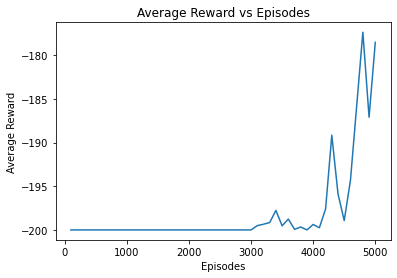

In [1]:
# Example code to be used in the DRL-lab
# Kalle Prorok, Umeå university 2020
# Inspired by https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f
# Original in the Barto&Sutton book Introduction to Reinforcement Learning

!pip install gym
import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
#env = gym.make('CartPole-v1')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    #print(num_states)
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))

    print('Q shape: {}, first 2 is state and 3rd is action.'.format(Q.shape))
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    print(reduction)
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            #if (i+1) % 100 == 0:
            #            if i >= (episodes - 20) or (i<5):
            #    env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() > epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {} Epsilon: {}'.format(i+1, ave_reward,epsilon))
            
    env.close()
    
    return ave_reward_list

# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')
plt.show()
plt.close()  
  